# Sara Ferrari, Michael Vizelman, Rachel Ward - M8 Assignment

## DAV 6150 

## Introduction

In this assignment we will be looking at data on loan applications and creating KNN and SVM classification models that predict whether a loan application will be approved or denied.  The output of the final model we will choose will be used by a regulator of the banking industry to attempt to identify potential instances of discrimination in lending practices by the banks it is tasked with regulating. 

The original dataset that will be used comes from [this website](https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html) and is comprised of 2,381 observations on whether the applicant was approved or denied for the mortgage application as well as various attributes regarding the applicant, the applicant's finances, and attributes about the home for which they are trying to obtain a mortgage. 

To accomplish our goal, we will perform the following steps:
- profiling the dataset and developing domain knowledge
- performing an Exploratory Data Analysis ("EDA")
- performing any necessary data preparation and/or transformations
- performing feature selection to determine which features will be most useful in our models
- creating the models and evaluating them
- choosing the best model and offering conclusions.

We will begin by profiling the dataset and developing domain knowledge.

## Data Profile & Domain Knowledge Development

Our dataset consists of one target variable and 12 explanatory variables which are:

* debt_to_income (originally named dir) - Total debt payments to total income ratio. This is one way that lenders measure your ability to pay the amount you are requesting. [Reference](https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/#:~:text=Your%20debt%2Dto%2Dincome%20ratio,money%20you%20plan%20to%20borrow.&text=If%20your%20gross%20monthly%20income,income%20ratio%20is%2033%20percent.)

* housing_to_income (originally named hir) - Housing expenses to income ratio. Typical finance advice says to spend no more than 30 to 40 percent of your monthly income in housing expense. [Reference](https://www.cnbc.com/2018/06/06/how-much-of-your-income-you-should-be-spending-on-housing.html#:~:text=As%20a%20general%20rule%2C%20you,interest%2C%20property%20taxes%20and%20maintenance.)

* loan_to_value (originally named lvr) - Ratio of size of loan to assessed value of property. This influences interest rates and can impact if you will be granted a mortgage, typically when buying a home you should make a down payment that is at least 20% of the home value to avoid paying mortgage insurance. [Reference](https://www.investopedia.com/terms/l/loantovalue.asp#:~:text=Understanding%20the%20Loan%2Dto%2DValue%20(LTV)%20Ratio&text=An%20LTV%20ratio%20is%20calculated,payment%2C%20you%20will%20borrow%20%2490%2C000.)

* consumer_credit_score (originally named ccs) - Consumer credit score from 1 to 6 (a low value being a good score). Typically banks will not grant mortgages to applicants with poor credit, or they will charge higher interest rates due to the added risk.

* mortgage_credit_score (originally named mcs) - Mortgage credit score from 1 to 4 (a low value being a good score).

* public_bad_credit (originally named pbcr) - Binary variable that indicates whether or not an applicant has any public bad credit records. Even after paying debt, bad credit records can remain on your public record for almost a decade. [Reference](https://www.creditkarma.com/advice/i/long-public-records-stay-credit-report#:~:text=Public%20records%20could%20plague%20your,your%20credit%20reports%20by%20mistake.)

* denied_insurance (originally named dmi) - Binary variable that indicates whether or not an applicant was denied mortgage insurance. As mentioned above, down payments of less than 20% often require mortgage insurance. If you were denied insurance, and your down payment was less than 20%, you would almost certainly be denied a mortgage.

* self_employed (originally named self) - Binary variable that indicates if an applicant is self employed. Since self employed individuals may have less stability in their income than salaried individuals for corporations, lenders may be hesistant to grant a mortgage to an applicant who is self-employed due to the higher risk involved.

* single - Binary variable that indicates if an applicant is single. 

* unemployment_history (originally named uria) - 1989 Massachusetts unemployment rate in the applicant's industry.

* condo (originally named condominium) - Binary variable indicating whether or not the unit is a condominium.

* black - Binary variable indicating whether or not the applicant is black.

* deny - Binary variable indicating whether or not the mortgage application was denied. This is our target variable.

## Preliminary Data Preparation

We will begin by reading the dataset into a dataframe, renaming columns as necessary, and checking for missing values. 

In [1]:
#import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#now read in the file
filename = "https://raw.githubusercontent.com/rachelward617/DAV-6150/master/M7_Data.csv"
loans = pd.read_csv(filename)

#check results
loans.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [2]:
#first drop the "Unnamed column" since it is the same as the index
loans = loans.drop(columns=['Unnamed: 0'])

#rename columns to aid in analysis
loans = loans.rename(columns={'dir': 'debt_to_income',
                              'hir': 'housing_to_income',
                              'lvr': 'loan_to_value',
                              'ccs': 'consumer_credit_score',
                              'mcs': 'mortgage_credit_score',
                              'pbcr': 'public_bad_credit',
                              'dmi': 'denied_insurance',
                              'self': 'self_employed',
                              'uria': 'unemployment_history', 
                              'comdominiom': 'condo'})

#check results
loans.head()

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [3]:
#now check for missing values
loans.isnull().sum()

debt_to_income           0
housing_to_income        0
loan_to_value            0
consumer_credit_score    0
mortgage_credit_score    0
public_bad_credit        1
denied_insurance         0
self_employed            1
single                   0
unemployment_history     0
condo                    0
black                    0
deny                     0
dtype: int64

Since there is missing data for both the public_bad_credit and self_employed attributes, we will now pull the row(s) related to the missing data.

In [4]:
#create a new data frame containing rows with missing data
loans_missing = loans[loans.isna().any(axis=1)]
#check results
loans_missing

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


Since there is only one row with missing data, and dropping one row will not materially impact our analysis, we will exclude this row from our data.

In [5]:
#drop row with the index of the row with missing data - 2380
loans_new = loans.copy()
indexname = loans[loans.isna().any(axis=1)].index
loans_new.drop(indexname,inplace=True)

#check results
loans_new

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.310,0.250,0.800000,1.0,1.0,no,no,yes,no,3.2,0,no,no
2376,0.300,0.300,0.777049,1.0,2.0,no,no,no,yes,3.2,1,no,no
2377,0.260,0.200,0.526761,2.0,1.0,no,no,no,no,3.1,0,no,no
2378,0.320,0.260,0.753846,6.0,1.0,yes,no,no,yes,3.1,1,yes,yes


Now that we have checked for and removed missing values, we will transform the columns that contain "no" and "yes" values to 0's and 1's, respectively.  This will allow us to utilize the information from these columns later on in our models. We will then check the data type of each column to see if the columns are the data types we are expecting.

In [6]:
#replace "yes" with 1 and "no" with 0 in all applicable columns for later use in our models
loans_new = loans_new.replace(to_replace = ['yes','no'],value = [1,0])

#check results
loans_new

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,0,0,0,0,3.9,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0,0,0,1,3.2,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,0,0,0,0,3.2,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0,0,0,0,4.3,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0,0,0,0,3.2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.310,0.250,0.800000,1.0,1.0,0,0,1,0,3.2,0,0,0
2376,0.300,0.300,0.777049,1.0,2.0,0,0,0,1,3.2,1,0,0
2377,0.260,0.200,0.526761,2.0,1.0,0,0,0,0,3.1,0,0,0
2378,0.320,0.260,0.753846,6.0,1.0,1,0,0,1,3.1,1,1,1


In [7]:
#check data types
loans_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 13 columns):
debt_to_income           2380 non-null float64
housing_to_income        2380 non-null float64
loan_to_value            2380 non-null float64
consumer_credit_score    2380 non-null float64
mortgage_credit_score    2380 non-null float64
public_bad_credit        2380 non-null int64
denied_insurance         2380 non-null int64
self_employed            2380 non-null int64
single                   2380 non-null int64
unemployment_history     2380 non-null float64
condo                    2380 non-null int64
black                    2380 non-null int64
deny                     2380 non-null int64
dtypes: float64(6), int64(7)
memory usage: 260.3 KB


All of the columns are the types we would expect. Each of the rate and ratio columns are floating point numbers, while the binary variables are integers. The variables consumer_credit_score and mortgage_credit_score are both listed as floats here while we were expecting integers. However, looking at the data it appears they are integers with a decimal .0 afterwards which is fine. We also confirmed that there are no longer any null values, so we will now proceed to our EDA.

## Exploratory Data Analysis

We will look at the distributions of each of the variables and check that our data is within valid ranges. We will also look at correlations to check which independent variables appear to be good predictors.

In [8]:
#get summary statistics for each numeric variable, including mean, standard deviation, median, quartiles, and range
loans_new.describe()

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.330814,0.255346,0.737776,2.116387,1.721008,0.073529,0.020168,0.116387,0.393277,3.774496,0.288235,0.142437,0.119748
std,0.107257,0.096656,0.178751,1.666721,0.537282,0.261058,0.140604,0.320755,0.488580,2.027062,0.453036,0.349571,0.324735
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.652681,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000
50%,0.330000,0.260000,0.779536,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000
75%,0.370000,0.298825,0.868459,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


We note that our sample size is 2,380 which is sufficiently large to build KNN and SVM models. 

Both debt_to_income and housing_to_income range from 0 to 3. The values of 3 seem like they may be outliers as this would mean the applicant had three times as much debt payments, or housing payments, respectively, compared to income each month. For these two ratios we would expect to see only values between 0 and 1. Similarly for loan_to_value, we were expecting to see only values from 0 to 1 as values over 1 would indicate that an applicant was applying for a loan greater than the value of the house. After further research, it appears that applicants may put in an offer for a value that is greater than the assessed value of the home if they are trying to outbid another buyer, so these values may be valid. Another explanation would be if an applicant was trying to buy a home that required renovation, the applicant may seek a loan value greater than the home's current value. 

We see that the consumer credit score ranges from 1 to 6, which is as expected. Similarly, mortgage credit score ranges from 1 to 4 which is as expected. 

The binary variables public_bad_credit, denied_insurance, self_employed, single, condo, black, and deny, all display as expected with only 1's and 0's. The unemployment_history variable ranges from 1.8 to 10.6. Based on our domain knowledge, this appears plausible as the unemployment rate will likely vary widely based on industry. 

Next, we will look at the rows with values greater than 1 for debt_to_income or housing_to_income, to see if we should eliminate these data points.

In [9]:
#create sub-frame with these columns
loan_sub = loans_new[['debt_to_income', 'housing_to_income', 'deny']]

#get any rows where the value is greater than 1 in any of these columns
possible_invalid = loan_sub[(loan_sub['debt_to_income'] > 1) |  (loan_sub['housing_to_income'] >1)]

#check results
possible_invalid

,debt_to_income,housing_to_income,deny
620,1.16,0.74,1
1094,3.00,3.00,1
1320,1.28,0.73,0
1927,1.42,1.10,1
1928,1.42,1.10,1


Although we thought that there should not be a debt_to_income ratio or housing_to_income ratio greater than 1, looking at these 5 rows it seems that having a ratio greater than 1 may help determine if an applicant was denied. Therefore we will leave four of these rows.

However, we believe that the row where debt_to_income and housing_to_income are both 3.0 is an invalid data point because it's difficult to believe an applicant would apply for a loan that would make their debt three times as high as their income. It is possible that this was a data entry error.   

Now we will remove the one row of invalid data, and check our other observations to see if there are any rows where housing_to_income is greater than debt_to_income, since debt_to_income encompasses housing_to_income by definition. 

In [10]:
#drop the row with invalid data - row with index 1094
indexname1 = loans_new[loans_new['debt_to_income']>=3].index
loans_new.drop(indexname1,inplace=True)

In [11]:
#create sub-frame with these columns
loan_sub = loans_new[['debt_to_income', 'housing_to_income', 'deny']]

#get any rows where the value of variable housing_to_income is greater than the value in variable debt_to_income
possible_invalid2 = loan_sub[(loan_sub['housing_to_income'] > loan_sub['debt_to_income'])]

#check results
possible_invalid2

,debt_to_income,housing_to_income,deny
289,0.28,0.33,0
349,0.00,0.29,0
1179,0.24,0.26,1
1477,0.30,0.33,0
1926,0.24,0.29,0


We see that there are 5 rows where the housing_to_income is greater than debt_to_income. As stated above, we believe this is not valid, and so we will now remove these five rows from our dataset.

In [12]:
#drop the rows with invalid data - indices 289, 349, 1179, 1477, 1926
indexname2 = list(possible_invalid2.index)
loans_new.drop(indexname2,inplace=True)
                                                                 
#reset the index
loans_new.reset_index(drop=True,inplace=True)

#print the dataframe
loans_new

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,0,0,0,0,3.9,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0,0,0,1,3.2,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,0,0,0,0,3.2,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0,0,0,0,4.3,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0,0,0,0,3.2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,0.310,0.250,0.800000,1.0,1.0,0,0,1,0,3.2,0,0,0
2370,0.300,0.300,0.777049,1.0,2.0,0,0,0,1,3.2,1,0,0
2371,0.260,0.200,0.526761,2.0,1.0,0,0,0,0,3.1,0,0,0
2372,0.320,0.260,0.753846,6.0,1.0,1,0,0,1,3.1,1,1,1


We see that we have the correct number of rows. 

Next, we will create an indicator variable based on the debt_to_income ratio variable. Based on our domain knowledge (reference available in our domain knowledge section above), we know that banks prefer to lend to individuals with a debt_to_income ratio of 0.43 or less. Therefore we believe that individuals with a debt_to_income ratio higher than .43 will be more likely to be denied a loan. We may choose to use this variable in place of debt_to_income later on in our models.

In [13]:
#create a list to hold the indicator variable values
list_debt=[]
#iterate all observations and check the debt_to_income ratio
# if greater than 0.43 append 1, otherwise append 0
for i in loans_new['debt_to_income']: 
    if i>0.43:
        list_debt.append(1)
    else:
        list_debt.append(0)
#create new column for the indicator variable
loans_new['debt_indicator']=list_debt
#check results
loans_new.head()

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny,debt_indicator
0,0.221,0.221,0.800000,5.0,2.0,0,0,0,0,3.9,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0,0,0,1,3.2,0,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,0,0,0,0,3.2,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0,0,0,0,4.3,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0,0,0,0,3.2,0,0,0,0


Now that we have removed data that we believe to be invalid and added an indicator variable, we will look at the distributions of each of our variables. We will split this portion into numeric data for which we will plot histograms, and categorical data for which we will plot bar plots.

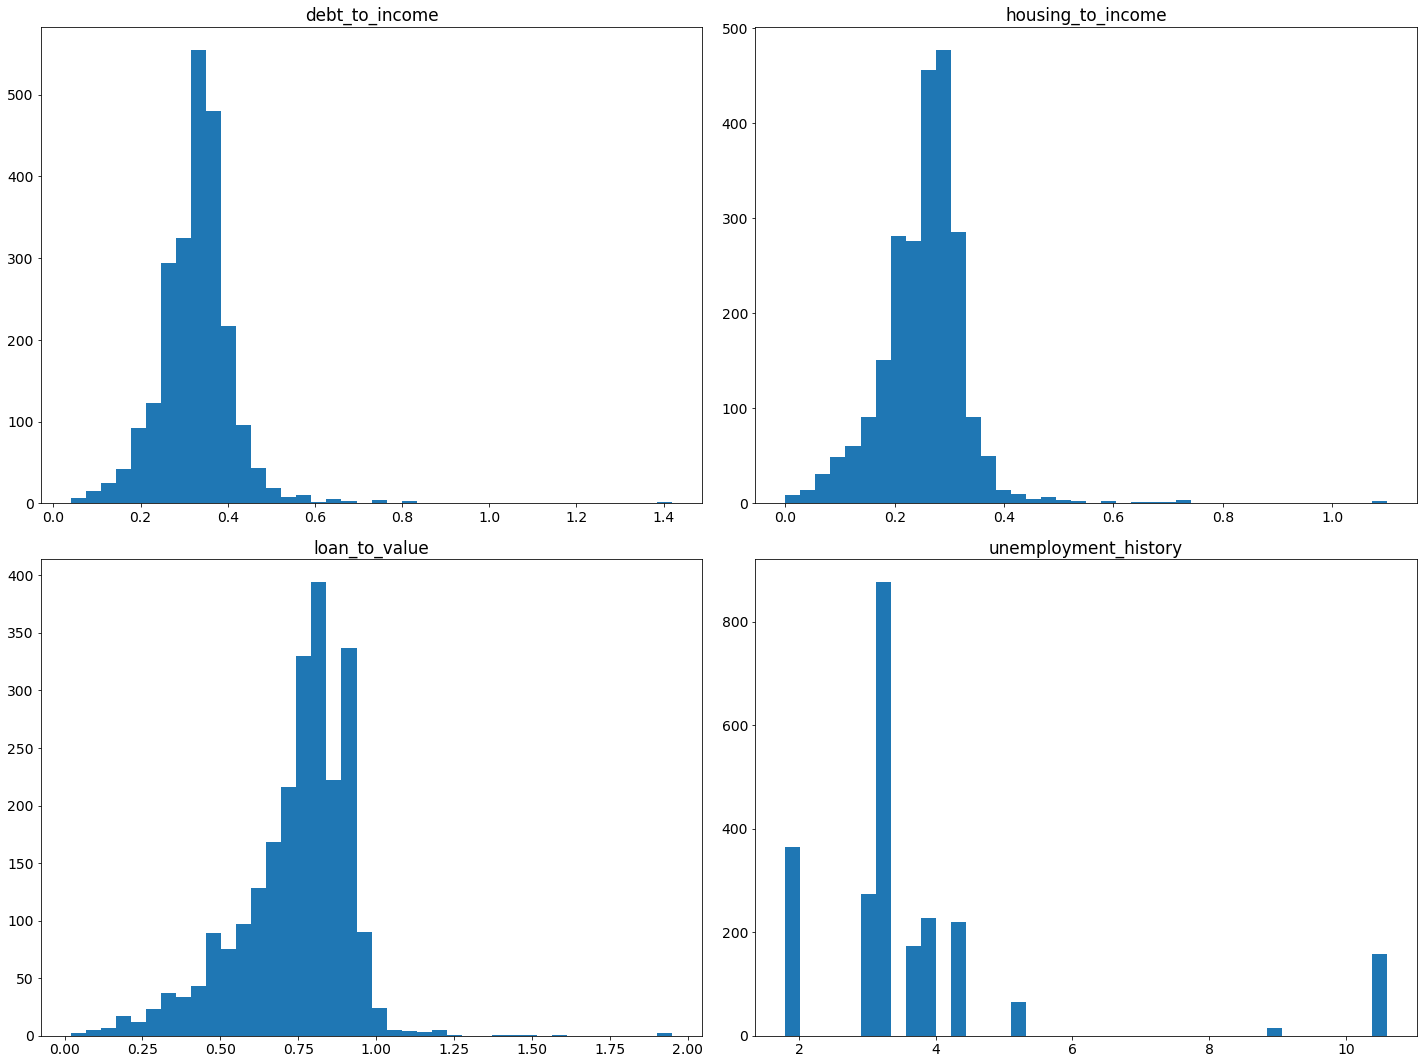

In [14]:
#create a smaller dataframe consisting of the numeric variables
loans_numeric = loans_new[['debt_to_income', 'housing_to_income', 'loan_to_value', 'unemployment_history']]

#plot a histogram for each of our numeric attributes

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,15)}) 

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
for k in loans_numeric :   #for each numerical column 
    plt.subplot(2,2,j) 
    plt.hist(loans_new[k],bins=40)
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

We see that debt_to_income and housing_to_income both appear to be somewhat normally distributed and centered somewhere around 0.3 (with some outliers). The variable loan_to_value appears to be left skewed with a peak at close to 0.8 (again, there appear to be  outliers). We also see that unemployment_history seems to be clustered, with most of the data between 2 and 5 and then another cluster centered around 10. 

We will now look at our categorical variables (including our target variable) as bar plots which show percentages of the total.

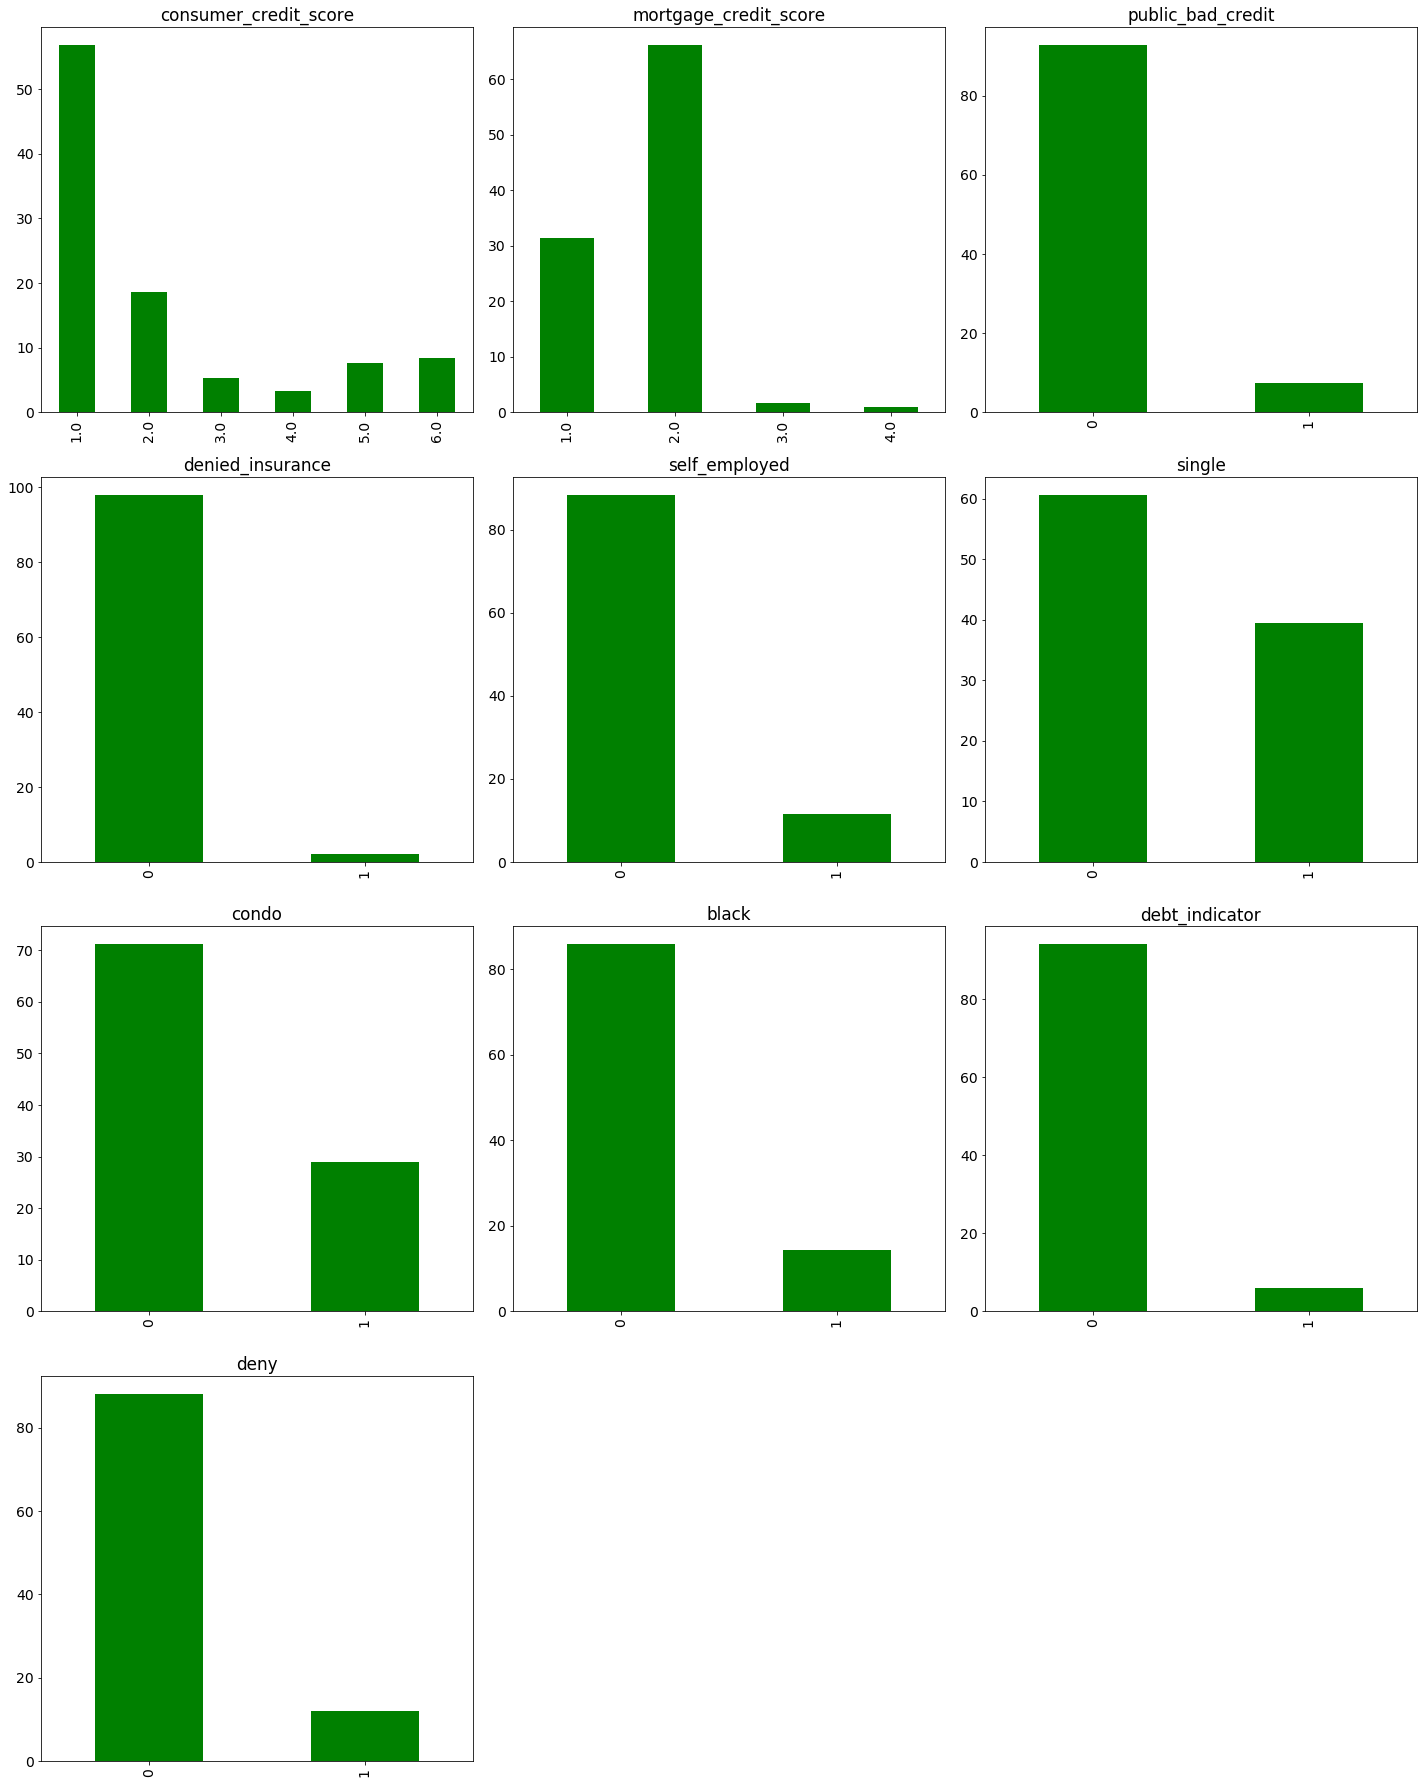

In [15]:
#create a smaller data frame consisting of our categorical attributes
loans_cat = loans_new[['consumer_credit_score','mortgage_credit_score','public_bad_credit', 
                       'denied_insurance','self_employed','single','condo','black','debt_indicator','deny']]

#plot a bar chart for each of our categorical attributes as % of total 

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,25)}) 

#use an index to identify the spot of the subplot
j=1

for k in loans_cat :   #for each categorical column 
    plt.subplot(4,3,j) 
    ((loans_new[k].value_counts()/len(loans_new[k]))*100).sort_index().plot(kind='bar', color='green');
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

From the above bar charts we note the following:
- over 50% of applicants had a good consumer credit score
- the majority (over 90%) of applicants had a mortgage credit score that was 2 or better
- over 80% of applicants did not have a public record of bad credit
- almost 100% of applicants were not denied insurance
- over 80% of applicants were not self employed; this is not surprising as most Americans work for companies
- around 60% of applicants were not single, with 40% of applicants being single
- the majority (almost 70%) of applicants were not applying for a mortgage for a condominium
- less than 20% of applicants were black
- less than 20% of applicants had a debt_to_income ratio above 0.43 (have a debt_indicator value of 1)
- less than 20% of applicants had their application denied

Now we will plot boxplots of the distribution of each numerical variable against the target variable (deny), to see if any of them would be clear predictors of the target.

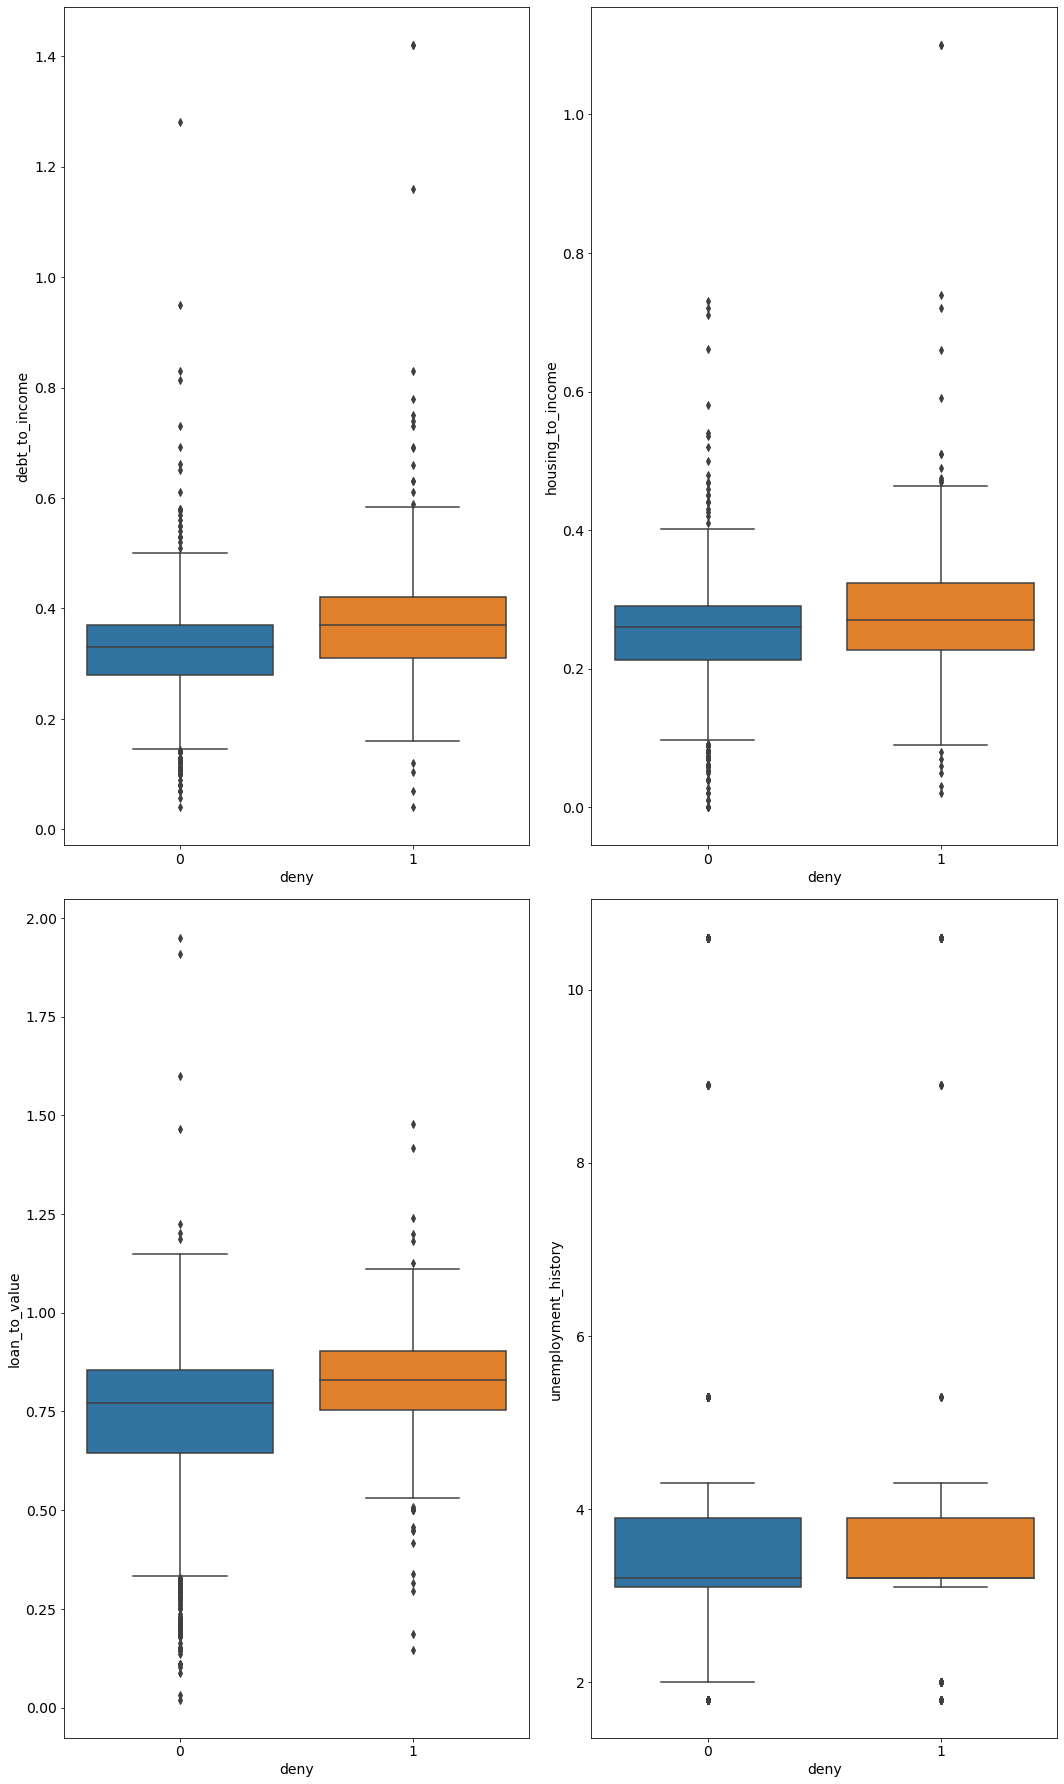

In [16]:
#plot boxplots of the distribution of each numerical variable against the target variable (deny)

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(15,25)}) 

#use an index to identify the spot of the subplot
j=1
for k in loans_numeric.columns.to_list():   #for each numerical variable 
    plt.subplot(2,2,j) 
    sns.boxplot(data=loans_new, x='deny', y=k)
    j=j+1

plt.tight_layout()
#show results    
plt.show()

Looking at the boxplots, we can see that a higher debt_to_income and a higher loan_to_value seem to be associated with a loan being denied. This tells us these variables will likely be good predictors of the target variable. 

We also note the presence of outliers in both classes of the target, in all the numerical variables. Next, we will look at boxplots of each numerical variable and check how many outliers we have.

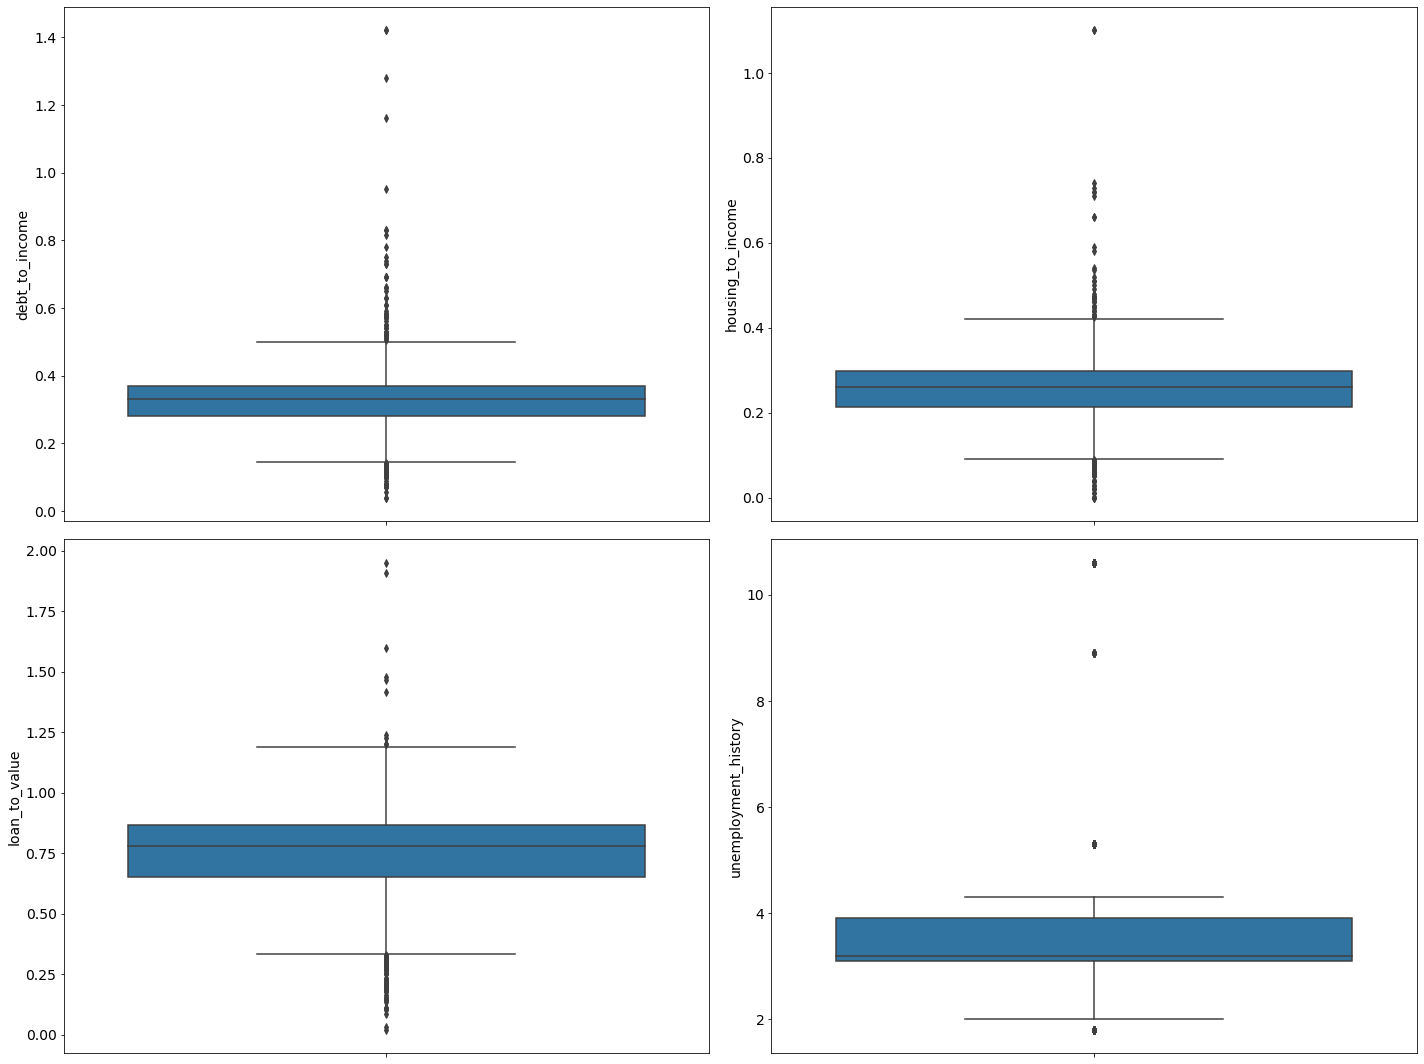

In [17]:
#plot boxplots of the distribution of each numerical variable

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,15)}) 

#use an index to identify the spot of the subplot
j=1
for k in loans_numeric.columns.to_list():   #for each numerical variable 
    plt.subplot(2,2,j) 
    sns.boxplot(data=loans_new, y=k)
    j=j+1

plt.tight_layout()
#show results    
plt.show()

In [18]:
#count number of outliers per column
columns = loans_numeric.columns.tolist()
new_df = loans_numeric.copy()  #create a copy of our data frame
print('Current Shape of dataset:',loans_numeric.shape)  #show shape of dataframe before

#use a for loop to iterate through the columns and count outliers
for k in columns:
    IQ3 = new_df[k].quantile(0.75)
    IQ1 = new_df[k].quantile(0.25)
    IQR = (IQ3-IQ1)*1.5
    print('Number of outliers for variable "%s" is:' %k, new_df.shape[0]-new_df[((new_df[k]>=(IQ1-IQR)) & (new_df[k]<=(IQ3+IQR)))].shape[0])

Current Shape of dataset: (2374, 4)
Number of outliers for variable "debt_to_income" is: 95
Number of outliers for variable "housing_to_income" is: 94
Number of outliers for variable "loan_to_value" is: 91
Number of outliers for variable "unemployment_history" is: 456


The variable with the most outliers is 'unemployment_history', which represent 19% of the data. In the other three variables, the outliers represent around 4% of the data. 

Since we have already discarded data we belived to be invalid, we decided not to discard any further observations. We also do not wish to discard these observations to avoid possible overfitting. 

Next we will look at a correlation heat map between our numerical variables and the target variable, to check for collinearity and see if there are any variables which are strongly correlated with the target variable (deny). 

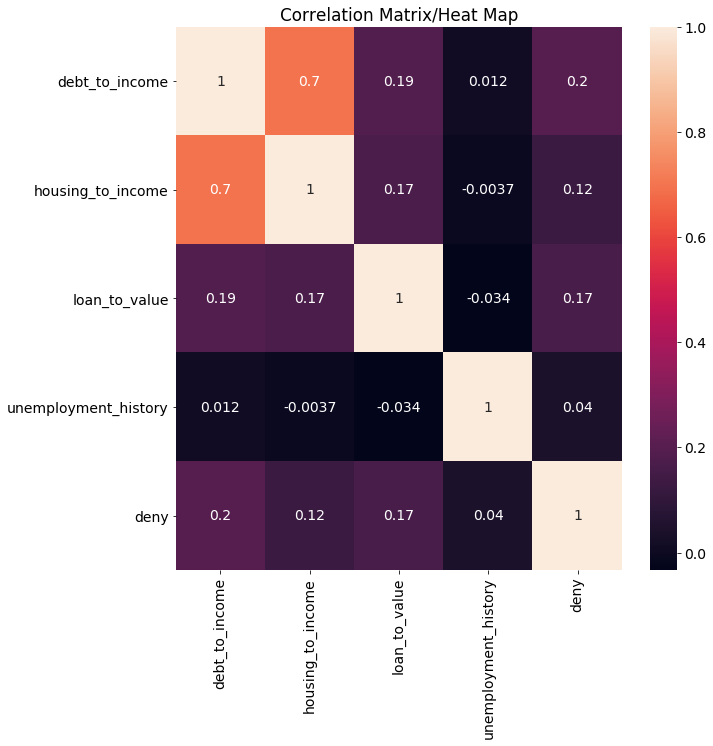

In [19]:
#get correlation matrix and plot it using seaborn

#set figure size
plt.figure(figsize=(10, 10)) 

#create a df with loans_numeric + target variables
corr_dataset = loans_numeric.copy()
corr_dataset['deny'] = loans_new.deny

#get correlation matrix
corrMatrix = corr_dataset.corr() 
#graph correlation matrix
sns.heatmap(corrMatrix, annot=True) 
plt.title('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Looking at our correlation heat map, there are no variables with strong correlations (defined here as greater than 0.75 or less than -0.75). The variables debt_to_income and housing_to_income do have a moderately strong correlation of .7.  Based on our domain knowledge, we believe that housing debt is part of the debt_to_income variable. Therefore we will only use debt_to_income, which also has a higher correlation with our target variable, in our model. 


Next, we will perform a chi-square test of independence between the target variable and our categorical variables.

In [20]:
#import stats module to perform chi-square
from scipy import stats

#perform chi-square test
chi_sq=[]
var_name = loans_cat.columns.tolist()
for i in range(0,9):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(loans_cat.deny, loans_cat.iloc[:,:-1].iloc[:,i]))[0:2],var_name[i]])
#sort results
chi_sq.sort(reverse=True)

#put results in a dataframe
chi_sq_df = pd.DataFrame(chi_sq,columns=['Chi_Sq_Value , P_value','Variable'])
chi_sq_df

,"Chi_Sq_Value , P_value",Variable
0,"(289.02068330399754, 8.127215619375593e-65)",denied_insurance
1,"(177.10124485217727, 2.0814405756672296e-40)",public_bad_credit
2,"(167.57666441048235, 2.3992758396214523e-34)",consumer_credit_score
3,"(126.3772302347067, 2.542539768945698e-29)",debt_indicator
4,"(99.462369342911, 1.999262525708676e-23)",black
5,"(28.50344542647948, 2.847406808975906e-06)",mortgage_credit_score
6,"(14.17214534433454, 0.00016682191356615637)",single
7,"(5.252860192454909, 0.021910726999450347)",self_employed
8,"(3.677216393818711, 0.055160868913777306)",condo


From our chi square test, the following six columns should be the most significant columns to include in our analysis:  

- denied_insurance
- public_bad_credit
- consumer_credit_score
- debt_indicator
- black
- mortgage_credit_score

The p-values indicate that each chi square value is statistically significant except for the chi_square value associated with the variable condo.

Based on our domain knowledge, there is a relationship between consumer_credit_score and public_bad_credit since both are metrics to evaluate credit score. We will perform a Chi-square test of independence between them to decide whether we should include them both. 

In [21]:
#chi_sq independence test between consumer_credit_score and public_bad_credit
stats.chi2_contingency(pd.crosstab(loans_cat.consumer_credit_score, loans_cat.public_bad_credit))[0:2]

(254.02264287459434, 7.532345713793848e-53)

We see that consumer_credit_score and public_bad_credit are not independent, and to avoid including redundant information in our models we will only use one of them. Since public_bad_credit has a higher chi_sq value with the target variable we will only use it.

## Model Creation 

We will now determine which combination of the predictor columns that we select below yields the model with the best results. To accomplish this we will create two different KNN models and two different SVM models and compare the results.

First we will split the data into test and train sets. We will then calculate the null error rate to have a baseline accuracy. Next, we will train the models, describe our findings, and then evaluate the models and compare them to prior models as applicable. Finally, we will pick the best model for our dataset, test it on our test sample, and offer conclusions.

Now, we will split our data into training and testing data sets.

In [22]:
#create a subset of the data removing the response variable 
x = loans_new.loc[:, loans_new.columns != 'deny']

#create a subset that is only the deny variable since that's the response variable
y = loans_new['deny']

In [23]:
#load train_test_split and metrics from scikit learn
from sklearn.model_selection import train_test_split 
from sklearn import metrics

#create training and testing variables, use 80% of the data to train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
#calculate proportion of applicants who were denied a loan
y_train.sum() / y_train.shape[0]

0.11848341232227488

In [25]:
from sklearn.metrics import confusion_matrix
#create a confusion matrix for a naive model always predicting 0
confusion_matrix(y_train,np.zeros(y_train.shape[0]))

array([[1674,    0],
       [ 225,    0]], dtype=int64)

We see that the percentage of applicants in our training set who were denied a loan is **11.8%**. This means that we could achieve a model accuracy of (1-.118) = 0.882 or **88.2%** by simply predicting 0 or "was not denied a loan" for each applicant. Such a high accuracy for a terrible model clearly tells us that accuracy would not be the best metric by which to evaluate our models. 

It is reasonable to assume that the cost of not denying a loan to  a "bad" applicant is greater than the cost of denying a loan to a "good" applicant. Meaning, we should be minimizing the false-negative predictions we generate, and preferring a model with a higher Recall metric (TP/(TP+FN)). 

However, it is still important not to lose "good" applicants. Therefore, we will evaluate our models by looking at the F1 score. The F1 score is the harmonic mean between precision and recall and will therefore be the most useful metric to strike a balance between the costs. Additionally, the F1 score is the best metric to use when the target is imbalanced, which is the case in this dataset.   

Based on the above, we will be most interested in the recall and F1 scores when comparing models. We will also look at the AUC and accuracy, since we are attempting to achieve the best trade-off between all of these metrics.

We decided not to normalize or standardize our data since the variables we plan to use are on a similar scale. 

We noted above in our EDA that the target variable is imbalanced, meaning that more than 80% of applicants in our dataset were NOT denied an application. Since we will be creating KNN and SVM classification models and we would also like to be able to compare them with a Logistic Regression classification model with the same predictor variables, we decided not to use oversampling to balance the target variable.   
[This article](https://win-vector.com/2015/02/27/does-balancing-classes-improve-classifier-performance/) explains that adjusting for an imbalanced class does not materially impact the performance of a logistic regression model.  
Additionally, [this article](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) states "reworking the problem itself is often the best way to tackle an imbalanced classes problem: the classifier and the decision rule have to be set with respect to a well chosen goal that can be, for example, minimizing a cost."

Now that we have checked our null error rate, and have decided upon the metrics of interest, we will create a sub-frame of the training set that only contains the columns we are interested in and train our first KNN model. We  will create a logistic regression model prior to the KNN model, using the same columns, to check if the use of a KNN model improves our results.  

### Model 1 - KNN - Correlation Threshold

For this model we look at the variables debt_to_income, loan_to_value, denied_insurance, public_bad_credit, black and mortgage_credit_score as these are the variables which had the strongest correlation and highest chi_sq values with the target variable, respectively. Note that we left off consumer_credit_score for the reasons listed above. Similarly, since we are using debt_to_income in this model, we will not use the debt_indicator variable that we created since the two contain the same information.

In [26]:
#define the predictor variables
predict = ['debt_to_income', 'loan_to_value', 'denied_insurance', 'public_bad_credit', 'black','mortgage_credit_score']

#create sub-frames of train and test sets that only contains the predictors in the model
x1_train = x_train[predict]
x1_test = x_test[predict]

In [27]:
#import stats model
import statsmodels.api as sm

#create our x to be used in the model based on the variables selected earlier
x1_logit = x1_train.copy()

#add constant
x1_logit = sm.add_constant(x1_logit)

#define and fit the model using logistic regression
results = sm.Logit(y_train,x1_logit).fit()

#print summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.280173
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 1899
Model:                          Logit   Df Residuals:                     1892
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Jul 2020   Pseudo R-squ.:                  0.2301
Time:                        23:17:08   Log-Likelihood:                -532.05
converged:                       True   LL-Null:                       -691.03
Covariance Type:            nonrobust   LLR p-value:                 1.152e-65
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.2370      0.585    -10.661      0.000      -7.384      -5.

We note that all the variables we chose for this model are statistically significant.
Next, we will generate cross-validated metrics for this model, for comparison going forward. We will use five folds to do the cross validation since our training set has 1899 observations, this will allow a sufficient sample size for training our model.

In [28]:
#import cross_val_score , LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()

#use k-fold cross validation
cross_val_results_recall_log1 = cross_val_score(model_logistic, x1_logit, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_log1 = cross_val_score(model_logistic, x1_logit, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_log1 = cross_val_score(model_logistic, x1_logit, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_log1 = cross_val_score(model_logistic, x1_logit, y_train, cv=5,scoring='f1')

#print results
print("Cross validated metrics for Logistic Regression Model 1\n")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_log1),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_log1),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_log1),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_log1),4))

Cross validated metrics for Logistic Regression Model 1

The average Accuracy score for the 5 folds was:  0.901
The average Recall score for the 5 folds was:  0.2533
The average AUC score for the 5 folds was:  0.7865
The average F1 score for the 5 folds was:  0.3741


Next, we will use cross-validation to find the optimal value of K for our KNN model.
As stated above, we will evaluate our models by looking at the F1 score. Therefore, we will choose the optimal K as the one that generates the maximum F1 score.

We will use five folds to do the cross validation since our training set has 1899 observations, this will allow a sufficient sample size for training our model.

In [29]:
#choose optimal K value for our model:
#load KNeighborsClassifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#create list to hold the mean of the F1 score per each K
f1 = [] 
#the maximum K we would allow is 43 which is the square root of the number of observations
for k in range(1,43):
    model1 = KNeighborsClassifier(n_neighbors=k)
    cross_val_results_f1 = cross_val_score(model1, x1_train, y_train, cv=5,scoring='f1')
    f1.append(cross_val_results_f1.mean())

In [30]:
#save the K with the maximum F1 score.
#the K equals to the index in the list +1, since the list index starts from 0 but referres to k=1
best_k=f1.index(max(f1))+1
#save the f1 value
f1_best_k=max(f1)

print('The optimal K for KNN model 1 is:',best_k)
print('The value of the F1 score for the optimal K is:', round(f1_best_k,4))

The optimal K for KNN model 1 is: 3
The value of the F1 score for the optimal K is: 0.406


The result shows that we should use K=3 neighbors for our model.
Now we will fit the model and use cross validation with 5 folds (again, due to our sample size this is an appropriate choice) to see the recall, accuracy, roc_auc, and f1 scores for our KNN model. 

In [31]:
#specify the model
knn1 = KNeighborsClassifier(n_neighbors=3)

#use k-fold cross validation
cross_val_results_recall_knn1 = cross_val_score(knn1, x1_train, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_knn1 = cross_val_score(knn1, x1_train, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_knn1 = cross_val_score(knn1, x1_train, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_knn1 = cross_val_score(knn1, x1_train, y_train, cv=5,scoring='f1')

#print results
print("Cross validated metrics for KNN Model 1\n")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_knn1),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_knn1),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_knn1),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_knn1),4))

Cross validated metrics for KNN Model 1

The average Accuracy score for the 5 folds was:  0.8926
The average Recall score for the 5 folds was:  0.3111
The average AUC score for the 5 folds was:  0.7183
The average F1 score for the 5 folds was:  0.406


In [32]:
#summary of comparison between models
summary_1 = pd.DataFrame(np.array([[round(np.mean(cross_val_results_accuracy_log1),4), round(np.mean(cross_val_results_recall_log1),4),
                                     round(np.mean(cross_val_results_rocauc_log1),4), round(np.mean(cross_val_results_f1_log1),4)],                                  
                                   [ round(np.mean(cross_val_results_accuracy_knn1),4), round(np.mean(cross_val_results_recall_knn1),4),
                                    round(np.mean(cross_val_results_rocauc_knn1),4), round(np.mean(cross_val_results_f1_knn1),4)]
                                   ]),
                   columns=['Accuracy', 'Recall','AUC', 'F1'],index=['Logistic1','KNN1'])
#print results
summary_1

,Accuracy,Recall,AUC,F1
Logistic1,0.9010,0.2533,0.7865,0.3741
KNN1,0.8926,0.3111,0.7183,0.4060


In our first KNN model, the average accuracy score from our cross-validation was narrowly better than our null error rate. This indicates that our model does add value. We have a relatively high AUC score which is good since a 1 would be a perfect AUC score. The recall and F1 scores for our KNN model are an improvement upon the recall and F1 scores from the logistic regression model using the same variables. 

Next we will create another KNN model using different variables.

### Model 2 - KNN 

For this model we will replace debt_to_income with the debt_indicator variable we created above. We will again create a logistic regression model with these same variables first in order to ensure that each of the variables we've selected are statistically significant, and for comparison.

In [33]:
#create a list of the predictor variables we will use 
predict2=['loan_to_value', 'denied_insurance', 'public_bad_credit', 'black', 'mortgage_credit_score', 'debt_indicator']

#create sub-frames of train and test sets that only contains the predictors in the model
x2_train = x_train[predict2]
x2_test = x_test[predict2]

In [34]:
#create our logistic regression model
#create our x to be used in the model based on the variables selected earlier
x2_logit = x2_train.copy()

#add constant
x2_logit = sm.add_constant(x2_logit)

#define the model type as logistic regression
results2 = sm.Logit(y_train,x2_logit).fit()

#print summary
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.272806
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 1899
Model:                          Logit   Df Residuals:                     1892
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Jul 2020   Pseudo R-squ.:                  0.2503
Time:                        23:17:20   Log-Likelihood:                -518.06
converged:                       True   LL-Null:                       -691.03
Covariance Type:            nonrobust   LLR p-value:                 1.146e-71
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.2647      0.499    -10.548      0.000      -6.243      -4.

We note that all the variables we chose for this model are statistically significant. Next, we will generate cross-validated metrics for this model, for comparison going forward. We will use five folds again, due to our sample size this is an appropriate choice.

In [35]:
#use k-fold cross validation
cross_val_results_recall_log2 = cross_val_score(model_logistic, x2_logit, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_log2 = cross_val_score(model_logistic, x2_logit, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_log2 = cross_val_score(model_logistic, x2_logit, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_log2 = cross_val_score(model_logistic, x2_logit, y_train, cv=5,scoring='f1')

#print results
print("Cross validated metrics for Logistic Regression Model 2\n")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_log2),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_log2),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_log2),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_log2),4))

Cross validated metrics for Logistic Regression Model 2

The average Accuracy score for the 5 folds was:  0.9068
The average Recall score for the 5 folds was:  0.2978
The average AUC score for the 5 folds was:  0.8003
The average F1 score for the 5 folds was:  0.4288


Next, we will determine what value of K we should use for our second KNN model using the same process as we did above.

In [36]:
#choose optimal K value for our model:
#load KNeighborsClassifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#create list to hold the mean of the F1 score per each K
f1_2 = [] 
#the maximum K we would allow is 43 which is the square root of the number of observations
for k in range(1,43):
    model2 = KNeighborsClassifier(n_neighbors=k)
    cross_val_results_f1_2 = cross_val_score(model2, x2_train, y_train, cv=5, scoring='f1')
    f1_2.append(cross_val_results_f1_2.mean())

In [37]:
#save the K with the maximum F1 score.
#the K equals to the index in the list +1, since the list index starts from 0 but referres to k=1
best_k2=f1_2.index(max(f1_2))+1
#save the f1 value
f1_best_k2=max(f1_2)

print('The optimal K for KNN model 2 is:',best_k2)
print('The value of the F1 score for the optimal K is:', round(f1_best_k2,4))

The optimal K for KNN model 2 is: 5
The value of the F1 score for the optimal K is: 0.4193


The result shows that we should use K=5 neighbors for our model. Now we will fit the model and use cross validation with 5 folds (again, due to our sample size this is an appropriate choice) to see the recall, accuracy, roc_auc, and f1 scores for our KNN model.

In [38]:
#specify the model
knn2 = KNeighborsClassifier(n_neighbors=5)

#use k-fold cross validation
cross_val_results_recall_knn2 = cross_val_score(knn2, x2_train, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_knn2 = cross_val_score(knn2, x2_train, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_knn2 = cross_val_score(knn2, x2_train, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_knn2 = cross_val_score(knn2, x2_train, y_train, cv=5,scoring='f1')

#print results
print("Cross validated metrics for KNN Model 2\n")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_knn2),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_knn2),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_knn2),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_knn2),4))

Cross validated metrics for KNN Model 2

The average Accuracy score for the 5 folds was:  0.8973
The average Recall score for the 5 folds was:  0.3156
The average AUC score for the 5 folds was:  0.727
The average F1 score for the 5 folds was:  0.4193


In [39]:
#summary of comparison between models
summary_2 = pd.DataFrame(np.array([[round(np.mean(cross_val_results_accuracy_log2),4), round(np.mean(cross_val_results_recall_log2),4),
                                    round(np.mean(cross_val_results_rocauc_log2),4), round(np.mean(cross_val_results_f1_log2),4)],
                                   [round(np.mean(cross_val_results_accuracy_knn2),4), round(np.mean(cross_val_results_recall_knn2),4),
                                    round(np.mean(cross_val_results_rocauc_knn2),4), round(np.mean(cross_val_results_f1_knn2),4)]
                                   ]),
                   columns=['Accuracy', 'Recall','AUC', 'F1'],index=['Logistic2','KNN2'])
#print results
summary_2

,Accuracy,Recall,AUC,F1
Logistic2,0.9068,0.2978,0.8003,0.4288
KNN2,0.8973,0.3156,0.7270,0.4193


In our second KNN model, the accuracy score for this model is only marginally better than the null error rate. The recall of this model is an improvement over the results of our second logistic regression model. However, the F1 score is slightly lower than in our second logistic regression model. 

When comparing both our KNN models, the recall and F1 score both improved in our second KNN model. 

Next we will create two different SVM models to see if we can improve our results further.

### Model 3 - SVM 

For the second part of the assignment we are going to create SVM models based on our training dataset. 
We are going to use the same two sets of variables as used above in the KNN and logistic regression models to compare our results.

For this model, as with the first KNN model, we look at the variables debt_to_income, loan_to_value, denied_insurance, public_bad_credit, black and mortgage_credit_score. 

First we create a SVM model with a linear kernel. Per our textbook ("HOML"), using a linear kernel should be the first step when performing SVM, especially if we are using many features (which we are).

In [40]:
#copy our first training set containing the variables of interest
x3_train = x_train[predict]

#import the necessary packages
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#save and fit the first SVM model
svm_lin_1 = SVC(kernel='linear')
svm_lin_1.fit(x3_train, y_train)

#use k-fold cross validation - we will use 5 folds per reasoning stated above
cross_val_results_recall_svm_lin1 = cross_val_score(svm_lin_1, x3_train, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_svm_lin1 = cross_val_score(svm_lin_1, x3_train, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_svm_lin1 = cross_val_score(svm_lin_1, x3_train, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_svm_lin1 = cross_val_score(svm_lin_1, x3_train, y_train, cv=5,scoring='f1')

#print results
print("Cross validated metrics for SVM Model 1 with linear kernel\n")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_svm_lin1),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_svm_lin1),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_svm_lin1),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_svm_lin1),4))

Cross validated metrics for SVM Model 1 with linear kernel

The average Accuracy score for the 5 folds was:  0.8989
The average Recall score for the 5 folds was:  0.16
The average AUC score for the 5 folds was:  0.6106
The average F1 score for the 5 folds was:  0.2686


The results of our first SVM model, using a linear kernel, show very low F1 score and recall. For this reason a linear kernel might not be the best choice. 

As suggested by the textbook, next we will run a SVM model with the Radial Basis Function (RBF) kernel to see if there are any improvements in the results.

In [41]:
#create the model with the RBF kernel on our training dataset
svm_rbf_1 = SVC(kernel='rbf')
svm_rbf_1.fit(x3_train, y_train)

#use k-fold cross validation - we will use 5 folds as per the reasoning stated above
cross_val_results_recall_svm_rbf1 = cross_val_score(svm_rbf_1, x3_train, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_svm_rbf1 = cross_val_score(svm_rbf_1, x3_train, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_svm_rbf1 = cross_val_score(svm_rbf_1, x3_train, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_svm_rbf1 = cross_val_score(svm_rbf_1, x3_train, y_train, cv=5,scoring='f1')

#print results
print("Cross validated metrics for the SVM Model with RBF kernel")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_svm_rbf1),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_svm_rbf1),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_svm_rbf1),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_svm_rbf1),4))

Cross validated metrics for the SVM Model with RBF kernel
The average Accuracy score for the 5 folds was:  0.8973
The average Recall score for the 5 folds was:  0.2222
The average AUC score for the 5 folds was:  0.7684
The average F1 score for the 5 folds was:  0.3311


We note that the recall, AUC, and F1 score for our model using an RBF kernel have improved over the results of the model with a linear kernel. For this reason we believe that the linear kernel wasn't the right kernel choice.

Now we want to check which is the best set of parameters to run the SVM model using the GridSearch function. We are following the procedure as decribed in this [article](https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29).


In [42]:
#import the packages
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

#save a dictionary with all the parameters that we want to test
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

#apply the function using the parameters from our dictionary above
#we will use 5 fold cross validation, for the reasons stated above
#we will focus on the f1 score since that is the metric most of interest
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=5, scoring='f1' )

#fit the function
grid.fit(x3_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   1.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.8s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] ........................ C=1, gamma=1, kernel=poly, total=   2.8s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   4.5s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   3.4s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   2.3s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   8.2s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=  42.5s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=  40.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=  27.5s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=  21.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=  44.2s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=  53.7s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total= 1.6min
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total= 1.5min
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=  46.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  9.5min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1', verbose=2)

In [43]:
#print the best result
best_estimator_1=grid.best_estimator_
print(best_estimator_1)

SVC(C=100, gamma=1, kernel='sigmoid')


In [44]:
#save the parameters to be used to fit the next model
model_param=pd.Series(best_estimator_1)

The GridSearch method shows that the best model in this particular case is a SVM model with a sigmoid kernel. We will use the parameters that were generated by the GridSearch to fit the model.

In [45]:
#save and fit the model with the chosen parameters
svm_sig_1 = model_param[0]
svm_sig_1.fit(x3_train, y_train)

#use k-fold cross validation - use 5 folds for the reasons decribed above
cross_val_results_recall_svm_sig1 = cross_val_score(svm_sig_1, x3_train, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_svm_sig1 = cross_val_score(svm_sig_1, x3_train, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_svm_sig1 = cross_val_score(svm_sig_1, x3_train, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_svm_sig1 = cross_val_score(svm_sig_1, x3_train, y_train, cv=5,scoring='f1')

#print results
print("Cross validated metrics for the SVM Model 1 with best F1 score \n")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_svm_sig1),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_svm_sig1),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_svm_sig1),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_svm_sig1),4))

Cross validated metrics for the SVM Model 1 with best F1 score 

The average Accuracy score for the 5 folds was:  0.8694
The average Recall score for the 5 folds was:  0.36
The average AUC score for the 5 folds was:  0.7072
The average F1 score for the 5 folds was:  0.3948


In [46]:
#summary of comparison between models
summary_df3 = pd.DataFrame(np.array([[round(np.mean(cross_val_results_accuracy_log1),4), round(np.mean(cross_val_results_recall_log1),4),
                                     round(np.mean(cross_val_results_rocauc_log1),4), round(np.mean(cross_val_results_f1_log1),4)],                                  
                                   [ round(np.mean(cross_val_results_accuracy_knn1),4), round(np.mean(cross_val_results_recall_knn1),4),
                                    round(np.mean(cross_val_results_rocauc_knn1),4), round(np.mean(cross_val_results_f1_knn1),4)],   
                                   [ round(np.mean(cross_val_results_accuracy_svm_sig1),4), round(np.mean(cross_val_results_recall_svm_sig1),4),
                                    round(np.mean(cross_val_results_rocauc_svm_sig1),4), round(np.mean(cross_val_results_f1_svm_sig1),4)]]),
                   columns=['Accuracy', 'Recall','AUC', 'F1'],index=['Logistic1','KNN1', 'SVM1'])

#print results
summary_df3

,Accuracy,Recall,AUC,F1
Logistic1,0.9010,0.2533,0.7865,0.3741
KNN1,0.8926,0.3111,0.7183,0.4060
SVM1,0.8694,0.3600,0.7072,0.3948


The F1 score and recall of our SVM model using the sigmoid kernel are an improvement upon the F1 score and the recall of the SVM models using different kernels. Of note, the accuracy rate for this SVM model using a sigmoid kernel is less than the null error rate. 

When comparing the results of the SVM model using the sigmoid kernel to the results of our first KNN and logistic regression models, we see that the KNN model has a better F1 score. The SVM model has a better recall, and the logistic regression has the best accuracy and AUC scores.

### Model 4 SVM - Indicator Variable

For this model, as with the second KNN model, we look at the variables loan_to_value, denied_insurance, public_bad_credit, black, mortgage_credit_score, and debt_indicator.

Since we know that the linear kernel is not a good fit for this dataset, we will not create a SVM model using a linear kernel. Instead we will first try a SVM model using an RBF kernel to have a baseline result for a SVM model using our second set of predictor variables. Then we will use the GridSearch function to determine the best type of kernel to use.

In [47]:
#create a copy of the training dataset with the variables of interest
x4_train = x_train[predict2]

#save and fit the model
svm_rbf_3 = SVC(kernel='rbf')
svm_rbf_3.fit(x4_train, y_train)

#use k-fold cross validation - use 5 folds for the reasons stated above
cross_val_results_recall_svm_rbf3 = cross_val_score(svm_rbf_3, x4_train, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_svm_rbf3 = cross_val_score(svm_rbf_3, x4_train, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_svm_rbf3 = cross_val_score(svm_rbf_3, x4_train, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_svm_rbf3 = cross_val_score(svm_rbf_3, x4_train, y_train, cv=5,scoring='f1')

#print results
print("Cross validated metrics for the SVM Model with RBF kernel \n")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_svm_rbf3),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_svm_rbf3),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_svm_rbf3),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_svm_rbf3),4))

Cross validated metrics for the SVM Model with RBF kernel 

The average Accuracy score for the 5 folds was:  0.8973
The average Recall score for the 5 folds was:  0.2133
The average AUC score for the 5 folds was:  0.7095
The average F1 score for the 5 folds was:  0.3263


In [48]:
#we are going to perform the GridSearch method using the same parameters as before.
grid2 = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=5, scoring='f1')
grid2.fit(x4_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.5s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   1.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.3s
[CV] 

[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   1.4s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   1.6s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .

[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.3s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 11.0min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1', verbose=2)

In [49]:
#print the best result
best_estimator_2=grid2.best_estimator_

print(best_estimator_2)

#save the parameters for later use in our model
model_param2=pd.Series(best_estimator_2)


SVC(C=100, gamma=1, kernel='sigmoid')


The GridSearch method shows that the best model in this particular case is a SVM with a sigmoid kernel. We will use these parameters to fit the model.

In [50]:
#save and fit the model
svm_sig2 = model_param2[0]
svm_sig2.fit(x4_train, y_train)

#use k-fold cross validation - use 5 folds for the reasons stated above
cross_val_results_recall_svm_sig2 = cross_val_score(svm_sig2, x4_train, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_svm_sig2 = cross_val_score(svm_sig2, x4_train, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_svm_sig2 = cross_val_score(svm_sig2, x4_train, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_svm_sig2 = cross_val_score(svm_sig2, x4_train, y_train, cv=5,scoring='f1')

#print results
print("Cross validated metrics for the SVM Model 2 with best F1 score \n")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_svm_sig2),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_svm_sig2),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_svm_sig2),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_svm_sig2),4))

Cross validated metrics for the SVM Model 2 with best F1 score 

The average Accuracy score for the 5 folds was:  0.8741
The average Recall score for the 5 folds was:  0.36
The average AUC score for the 5 folds was:  0.714
The average F1 score for the 5 folds was:  0.4023


In [51]:
#summary of comparison between models
summary_df4 = pd.DataFrame(np.array([[round(np.mean(cross_val_results_accuracy_log2),4), round(np.mean(cross_val_results_recall_log2),4),
                                    round(np.mean(cross_val_results_rocauc_log2),4), round(np.mean(cross_val_results_f1_log2),4)],
                                   [round(np.mean(cross_val_results_accuracy_knn2),4), round(np.mean(cross_val_results_recall_knn2),4),
                                    round(np.mean(cross_val_results_rocauc_knn2),4), round(np.mean(cross_val_results_f1_knn2),4)],
                                   [round(np.mean(cross_val_results_accuracy_svm_sig2),4), round(np.mean(cross_val_results_recall_svm_sig2),4),
                                    round(np.mean(cross_val_results_rocauc_svm_sig2),4), round(np.mean(cross_val_results_f1_svm_sig2),4)]
                                   ]),
                   columns=['Accuracy', 'Recall','AUC', 'F1'],index=['Logistic2','KNN2','SVM2'])

#print results
summary_df4

,Accuracy,Recall,AUC,F1
Logistic2,0.9068,0.2978,0.8003,0.4288
KNN2,0.8973,0.3156,0.7270,0.4193
SVM2,0.8741,0.3600,0.7140,0.4023


Our second SVM model with a sigmoid kernel had a lower F1 score than both our second KNN and second logistic regression models. However, this SVM model had a higher recall than the KNN and logistic regression models. 

Again, we note that the accuracy for the SVM model is lower than the null error rate. The AUC score for the SVM model is the lowest of the three models using the same variables.

## Model Comparisons & Conclusions

Now we will compare the results of our models. We will create a dataframe of the accuracy, recall, AUC, and F1 scores.

In [52]:
#summary of comparison between models
summary_df = pd.DataFrame(np.array([[round(np.mean(cross_val_results_accuracy_log1),4), round(np.mean(cross_val_results_recall_log1),4),
                                     round(np.mean(cross_val_results_rocauc_log1),4), round(np.mean(cross_val_results_f1_log1),4)],                                  
                                   [ round(np.mean(cross_val_results_accuracy_knn1),4), round(np.mean(cross_val_results_recall_knn1),4),
                                    round(np.mean(cross_val_results_rocauc_knn1),4), round(np.mean(cross_val_results_f1_knn1),4)],   
                                   [ round(np.mean(cross_val_results_accuracy_svm_sig1),4), round(np.mean(cross_val_results_recall_svm_sig1),4),
                                    round(np.mean(cross_val_results_rocauc_svm_sig1),4), round(np.mean(cross_val_results_f1_svm_sig1),4)],
                                   [round(np.mean(cross_val_results_accuracy_log2),4), round(np.mean(cross_val_results_recall_log2),4),
                                    round(np.mean(cross_val_results_rocauc_log2),4), round(np.mean(cross_val_results_f1_log2),4)],
                                   [round(np.mean(cross_val_results_accuracy_knn2),4), round(np.mean(cross_val_results_recall_knn2),4),
                                    round(np.mean(cross_val_results_rocauc_knn2),4), round(np.mean(cross_val_results_f1_knn2),4)],
                                   [round(np.mean(cross_val_results_accuracy_svm_sig2),4), round(np.mean(cross_val_results_recall_svm_sig2),4),
                                    round(np.mean(cross_val_results_rocauc_svm_sig2),4), round(np.mean(cross_val_results_f1_svm_sig2),4)]
                                   ]),
                   columns=['Accuracy', 'Recall','AUC', 'F1'],index=['Logistic1','KNN1', 'SVM1', 'Logistic2','KNN2','SVM2'])

#print results
summary_df

,Accuracy,Recall,AUC,F1
Logistic1,0.9010,0.2533,0.7865,0.3741
KNN1,0.8926,0.3111,0.7183,0.4060
SVM1,0.8694,0.3600,0.7072,0.3948
Logistic2,0.9068,0.2978,0.8003,0.4288
KNN2,0.8973,0.3156,0.7270,0.4193
SVM2,0.8741,0.3600,0.7140,0.4023


We note that the **Accuracy** of both KNN models is better than the null error rate of 88.2%. For the SVM models this is not the case. 

The **Recall** scores for our KNN and SVM models are better than the recall score of the naive model (where we predict 0 for each applicant), which was 0 and better than both the logistic regression models. Both of the SVM models have the highest recall scores.

The **AUC** scores are higher for the logistic regression models while the KNN and SVM models do not perform as well.  

The **F1** score of the second KNN model is the highest excluding the logistic regression. From the begininning, the F1 score has been the metric that led us to the models which we created (we used F1 as the scoring method in the cross validation to choose the optimal K value in the KNN models, as well as in the GridSearch cross validation).    

Based on the reasons above, and since the scope of this assignment is to use KNN or SVM models, we select **model KNN 2** as the model to which we will apply our testing subset.

## Preferred Model Application & Performance

Now we will apply our testing subset to our third model and see if the results are as expected.

In [53]:
#create a copy of x_test
x_test1 = x_test.copy()

#select the columns
x_test1 = x_test1[predict2]

#fit the model - above we used cross validation which does not require us to explicitly fit the model
knn2.fit(x2_train,y_train)

#use our model to predict values from the test set
predictions = knn2.predict(x_test1)

#check results
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [54]:
#get confusion_matrix() from sklearn 
from sklearn.metrics import confusion_matrix

#create the confusion matrix
test_conf_mat = confusion_matrix(y_test, predictions)

#check results 
test_conf_mat

array([[401,  16],
       [ 39,  19]], dtype=int64)

In [55]:
#import functions from sklearn 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#apply accuracy function to the dataset 
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy is:%s" %round(test_accuracy,4))

#apply recall function to the dataset
test_sensitivity = recall_score(y_test, predictions)
print("Test Recall is:%s" %round(test_sensitivity,4))

#get the AUC
fprtest, tprtest, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1) #apply roc_curve() to get fpr, tpr
test_auc = metrics.auc(fprtest, tprtest) #print the AUC
print("Test AUC is:", round(test_auc,4))

#apply F1 function to the dataset
test_F1_score = f1_score(y_test, predictions)
print("Test F1 Score is:%s" %round(test_F1_score,4))

Test Accuracy is:0.8842
Test Recall is:0.3276
Test AUC is: 0.6446
Test F1 Score is:0.4086


In [56]:
#add the test values to our dataframe with the results for easy comparison
summary_df = summary_df.append(pd.Series({'Accuracy': round(test_accuracy,4), 'Recall': round(test_sensitivity,4), 'AUC': round(test_auc,4), 'F1': round(test_F1_score,4)},name = 'Test'), ignore_index = False)

#print results
summary_df

,Accuracy,Recall,AUC,F1
Logistic1,0.9010,0.2533,0.7865,0.3741
KNN1,0.8926,0.3111,0.7183,0.4060
SVM1,0.8694,0.3600,0.7072,0.3948
Logistic2,0.9068,0.2978,0.8003,0.4288
KNN2,0.8973,0.3156,0.7270,0.4193
SVM2,0.8741,0.3600,0.7140,0.4023
Test,0.8842,0.3276,0.6446,0.4086


## Conclusions

Our preferred model (KNN 2) had a better recall score on our test data than on our training data. It also had nearly the same F1 score. The preferred model had a lower AUC than we expected, and also had a lower accuracy than it did when applied to our training data. However, the accuracy is still above the null error rate. 

It is promising that our test data yielded a higher recall score, and an F1 score that was only very slightly lower, since these were the two metrics most of interest given the purpose of our model. 